In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
sample_submission = pd.read_csv('.\\data\\sample_submission.csv')
train_data = pd.read_csv('.\\data\\train.csv')
test_data = pd.read_csv(".\\data\\test.csv")

In [3]:
train_data.shape, test_data.shape, sample_submission.shape

((47439, 41), (31626, 40), (31626, 2))

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
pd.set_option('display.max_columns', None)    # 显示所有列
pd.set_option('display.max_rows', 200)        # 最多显示200行

In [5]:
train_copy = train_data.copy()
test_copy = test_data.copy()

In [6]:
train_copy[:5]

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",0.0,NaN,1.0,0.0,0.0,Los Altos,Santa Rita Elementary School,7.0,0.4,NaN,NaN,NaN,Los Altos High School,8.0,1.3,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,3,2.0,2.0,872.0,1.0,1.0,Los Angeles,Raymond Avenue Elementary School,3.0,0.8,John Muir Middle School,2.0,1.1,Augustus F. Hawkins High A Critical Design And...,2.0,1.3,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...",NaN,Inside,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,3.0,1.0,1152.0,0.0,0.0,Strawberry,NaN,NaN,NaN,NaN,NaN,NaN,Long Barn High School,NaN,10.1,NaN,Forced air,NaN,NaN,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,3.0,3.0,2612.0,0.0,0.0,Culver City,Farragut Elementary School,9.0,0.2,Culver City Middle School,7.0,0.2,Culver City High School,8.0,0.2,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creston,Santa Margarita Elementary School,6.0,8.5,Atascadero Middle School,5.0,10.2,Atascadero High School,6.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [7]:
train_nan = pd.DataFrame(train_data.isnull().sum(), columns=['nan_sum'])
train_nan['percentage %'] = train_nan['nan_sum'] / train_data.shape[0] * 100
train_nan

,nan_sum,percentage %
Id,0,0.000000
Address,0,0.000000
Sold Price,0,0.000000
Summary,350,0.737790
Type,0,0.000000
Year built,1045,2.202829
Heating,6465,13.628028
Cooling,10622,22.390860
Parking,908,1.914037
Lot,14181,29.893126


In [8]:
test_nan = pd.DataFrame(test_data.isnull().sum(), columns=['nan_sum'])
test_nan['percentage %'] = test_nan['nan_sum'] / test_data.shape[0] * 100
test_nan

,nan_sum,percentage %
Id,0,0.000000
Address,0,0.000000
Summary,489,1.546196
Type,0,0.000000
Year built,897,2.836274
Heating,5048,15.961551
Cooling,4487,14.187694
Parking,768,2.428382
Lot,8808,27.850503
Bedrooms,1726,5.457535


In [9]:
train_copy['Zip'] = train_copy['Zip'].astype(str)

In [10]:
train_copy['Listed On'] = pd.to_datetime(train_copy['Listed On'], format="%Y-%m-%d")
train_copy['Last Sold On'] = pd.to_datetime(train_copy['Last Sold On'], format="%Y-%m-%d")

train_copy['listed on year'] = train_copy['Listed On'].dt.year
train_copy['Last Sold on year'] = train_copy['Last Sold On'].dt.year

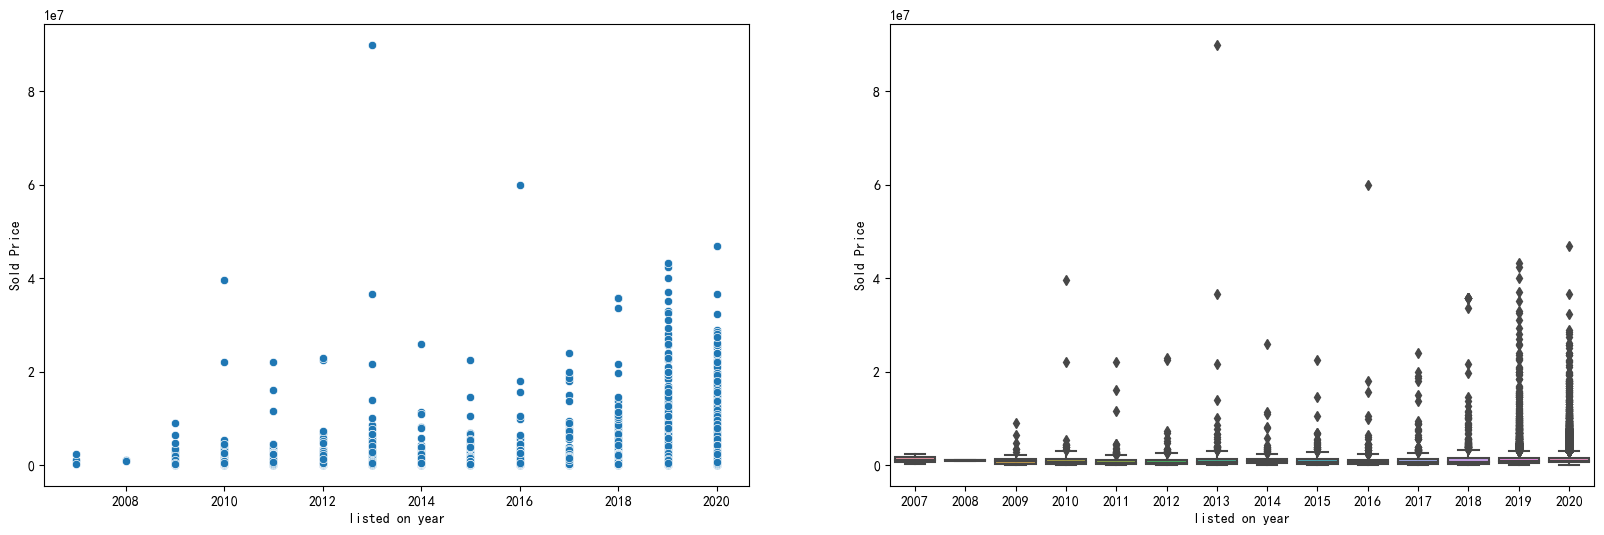

In [11]:
figure, ax = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(data = train_copy, x = 'listed on year', y = 'Sold Price', ax = ax[0])
sns.boxplot(data = train_copy, x = 'listed on year', y = 'Sold Price', ax = ax[1])
plt.show()

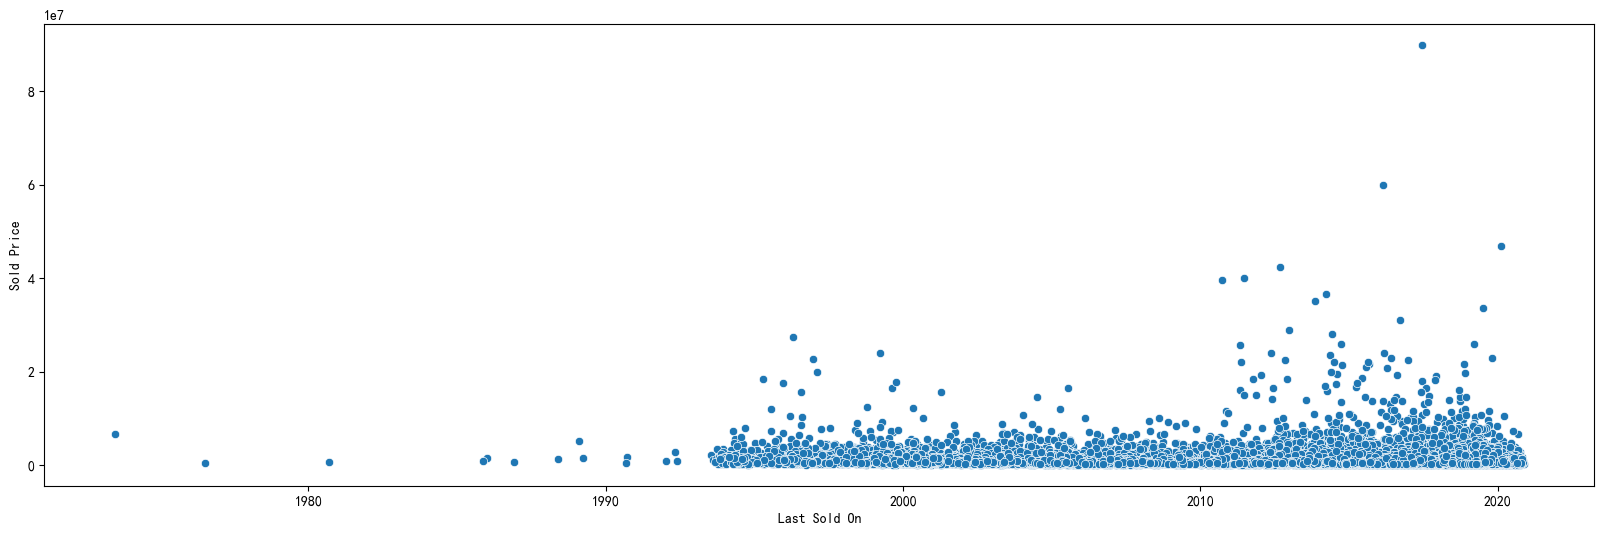

In [12]:
plt.figure(figsize =(20,6))
sns.scatterplot(train_copy, x='Last Sold On', y = 'Sold Price')
plt.show()


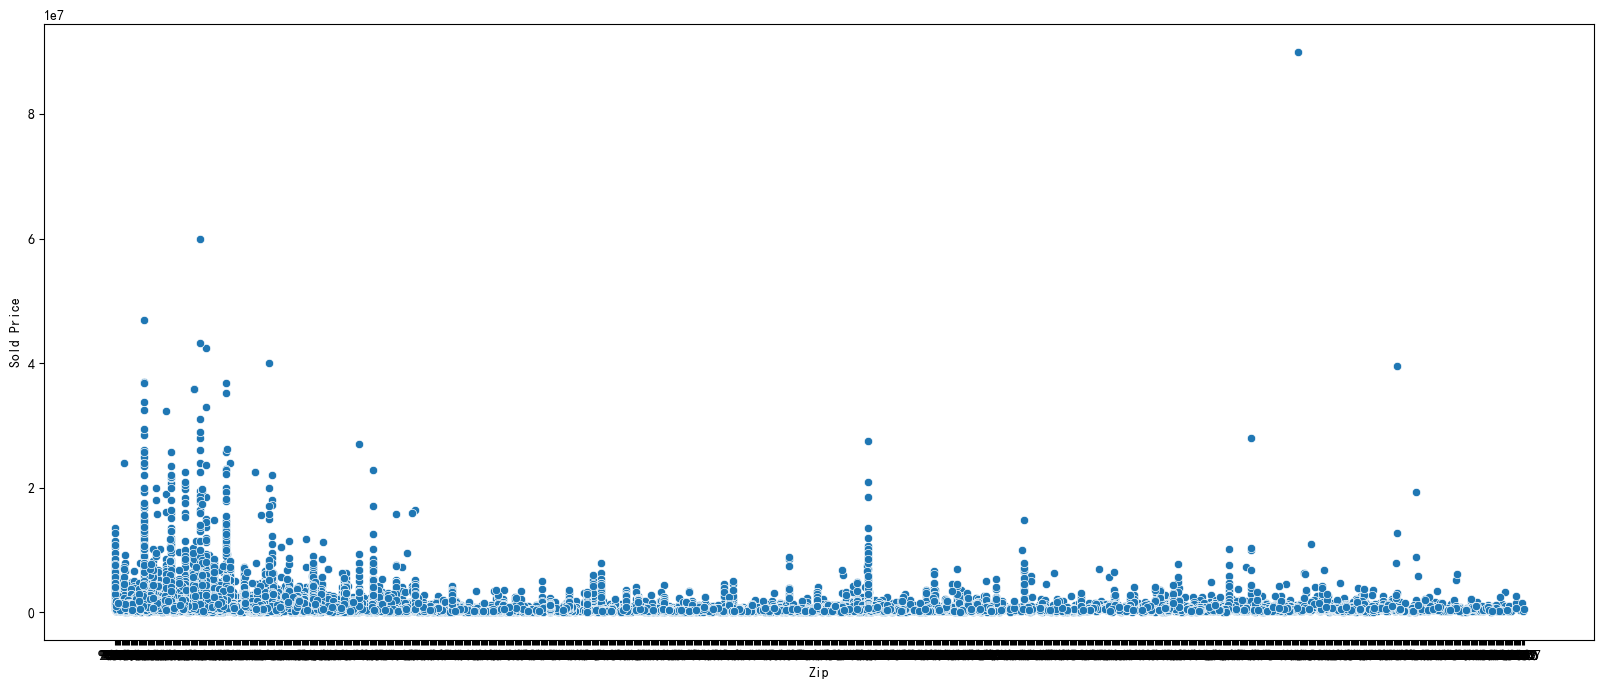

In [13]:
train_copy['Zip'].value_counts()
plt.figure(figsize=(20,8))
sns.scatterplot(train_copy, x='Zip', y='Sold Price')
plt.show()

In [14]:
num_feature = train_copy.dtypes[train_copy.dtypes != 'object'].index
num_feature

Index(['Id', 'Sold Price', 'Year built', 'Lot', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School Score', 'Middle School Distance', 'High School Score',
       'High School Distance', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Last Sold On', 'Last Sold Price',
       'listed on year', 'Last Sold on year'],
      dtype='object')

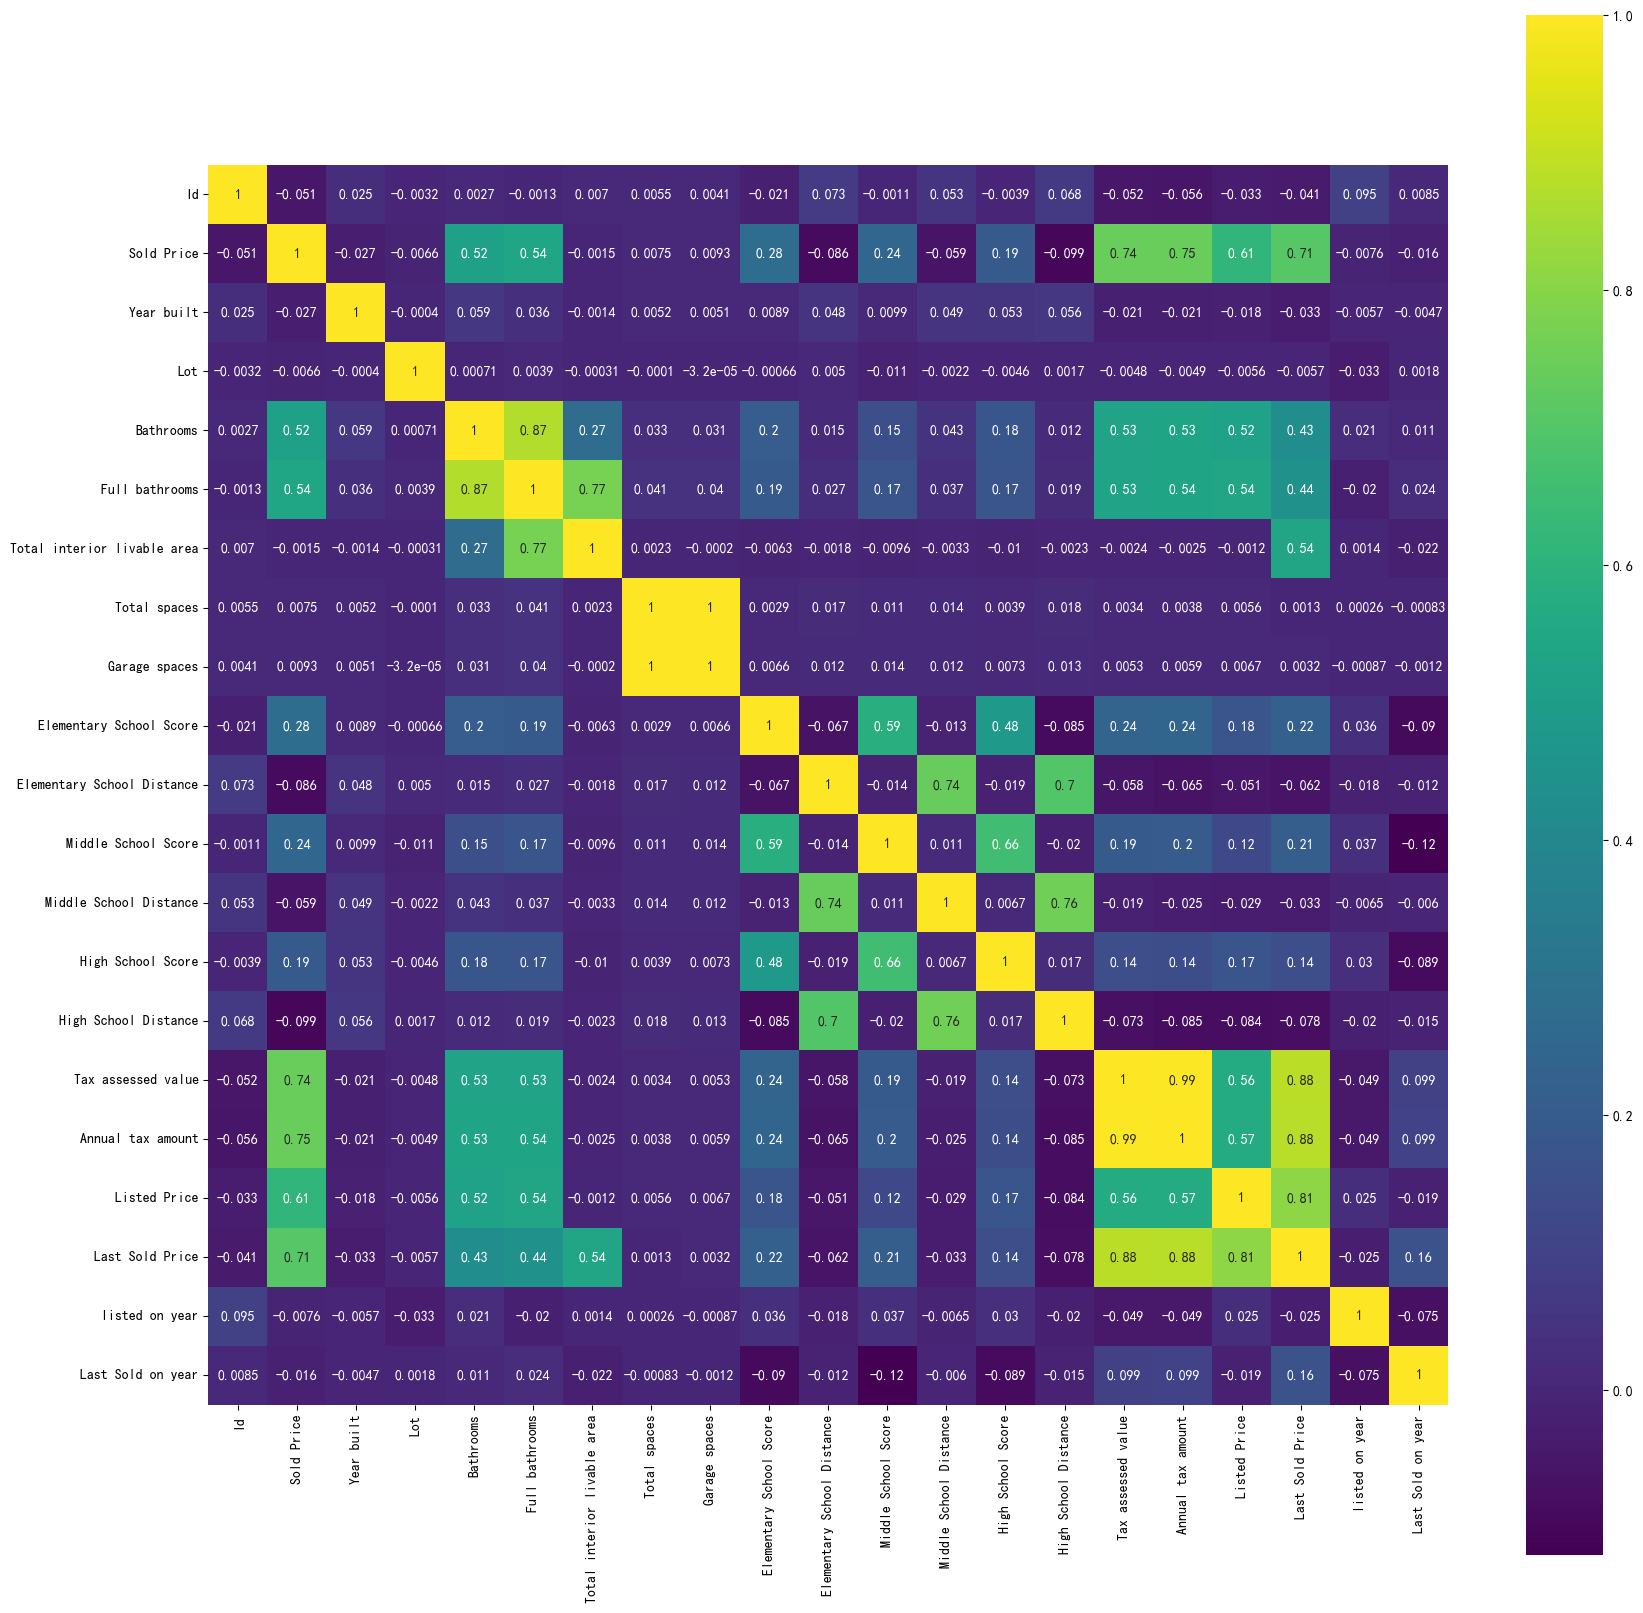

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))

sns.heatmap(train_copy[num_feature].corr(), square=True, cmap= colormap, linecolor='white', annot = True)
plt.show()

In [16]:
s = train_copy['City'].value_counts()[:20]
s

Los Angeles       10246
San Jose           6503
San Francisco      4974
San Mateo          1033
Santa Clara        1025
Sunnyvale           804
Santa Cruz          796
Los Gatos           626
Morgan Hill         583
Redwood City        544
Gilroy              521
Mountain View       509
Palo Alto           500
Compton             482
Milpitas            456
Aptos               440
Los Altos           429
Culver City         406
West Hollywood      388
Watsonville         380
Name: City, dtype: int64

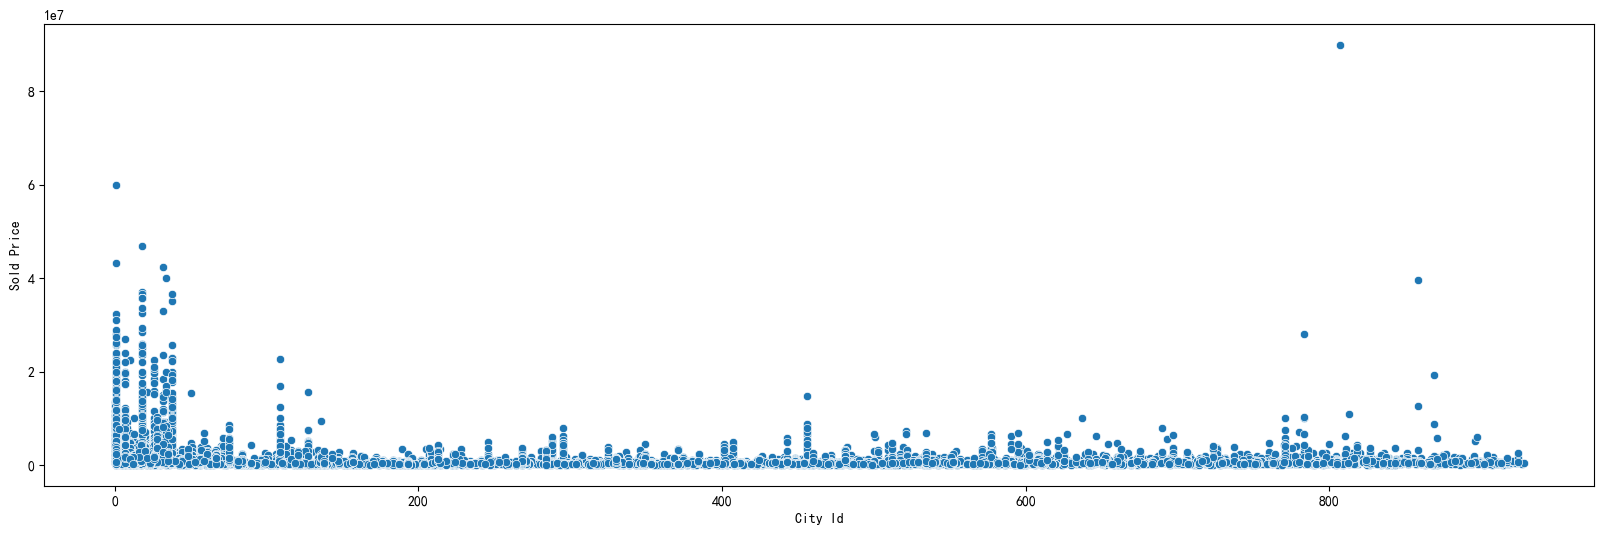

In [17]:
train_copy['City Id'] = pd.factorize(train_copy['City'])[0]
plt.figure(figsize=(20,6))
sns.scatterplot(data=train_copy, x = 'City Id', y= 'Sold Price')
plt.show()

In [18]:
train_copy['bedroom num'] = train_copy['Bedrooms'].fillna(24)
train_copy['bedroom num'] = train_copy['bedroom num'].replace('[a-zA-Z]', 24, regex=True)
train_copy['bedroom num'] = pd.Series(train_copy['bedroom num'], dtype=int)
train_bed_df = train_copy[train_copy['bedroom num'] != 24]
train_bed_df['bedroom num'].describe()

count    37241.000000
mean         2.977525
std          1.282035
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         42.000000
Name: bedroom num, dtype: float64

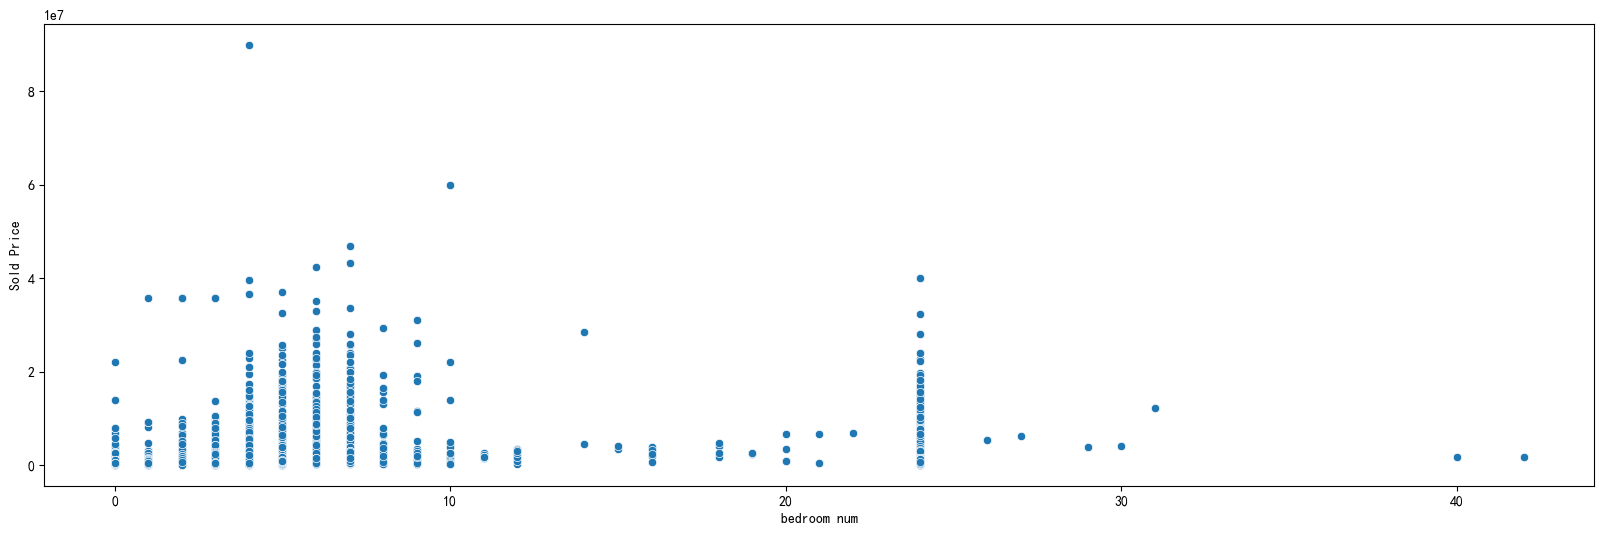

In [19]:
#train_copy['bedroom num'] = pd.factorize(train_copy['Bedrooms'])[0]
plt.figure(figsize=(20,6))
sns.scatterplot(data=train_copy, x = 'bedroom num', y= 'Sold Price')
plt.show()

In [20]:
train_bed_df[['bedroom num','Sold Price']].corr()

,bedroom num,Sold Price
bedroom num,1.000000,0.305958
Sold Price,0.305958,1.000000


In [21]:
train_copy['bedroom num'] = train_copy['bedroom num'].replace(24,3)
train_copy[['bedroom num','Sold Price']].corr()

,bedroom num,Sold Price
bedroom num,1.000000,0.280415
Sold Price,0.280415,1.000000


In [22]:
train_copy['score sum'] = train_copy['Elementary School Score'] + train_copy['Middle School Score'] + train_copy['High School Score']
train_copy[['score sum', 'Sold Price']].corr()

,score sum,Sold Price
score sum,1.000000,0.282008
Sold Price,0.282008,1.000000


In [23]:
train_data['Type'].value_counts()


SingleFamily                                                                                           31324
Condo                                                                                                   8094
Townhouse                                                                                               2545
Unknown                                                                                                 1597
MultiFamily                                                                                             1292
MobileManufactured                                                                                      1002
VacantLand                                                                                               810
Single Family                                                                                            177
Apartment                                                                                                169
Residential Lot    